## Hi MLearners
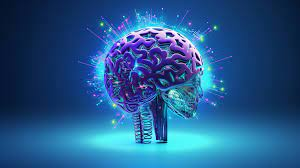

<h1 style="color: skyblue;font-weight: bolder ;font-style: italic ;">In this Notebook we will be dealing with the offline hand writting images recognition and extraction</h1>


<img src="https://www.myscript.com/hero-artwork.webp"  />

#### **Offline Handwritten Text Recognition (OHTR)** is the technology that automatically converts handwritten text from images into machine-readable text. It finds applications in various fields like document digitization, cheque processing, medical transcription, and form processing. OHTR is an active area of research, with ongoing efforts to improve its accuracy and expand its applications.

### We will go with basic approach divided into steps :

## As always we start with importing libraries 

In [4]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings 
import tensorflow as tf
import string
import datetime
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
train = pd.read_csv("F:/data/handwrittenpics/written_name_train_v2.csv")
valid = pd.read_csv("F:/data/handwrittenpics/written_name_validation_v2.csv")

In [7]:
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [8]:
valid.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


In [10]:
print(train.info())
print(valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None


In [11]:
train.shape , valid.shape

((330961, 2), (41370, 2))

In [12]:
train.value_counts()

FILENAME          IDENTITY 
TRAIN_00001.jpg   BALTHAZAR    1
TRAIN_291526.jpg  CAMPOURCY    1
TRAIN_291506.jpg  BELLO        1
TRAIN_291505.jpg  BOISSIERE    1
TRAIN_291504.jpg  LOUNA        1
                              ..
TRAIN_191201.jpg  CHOMEL       1
TRAIN_191200.jpg  BARDIN       1
TRAIN_19120.jpg   LAURI-ANN    1
TRAIN_191199.jpg  TILLEMAN     1
TRAIN_99999.jpg   DIMITRI      1
Length: 330396, dtype: int64

In [17]:
(train.dtypes ),(valid.dtypes)

(FILENAME    object
 IDENTITY    object
 dtype: object,
 FILENAME    object
 IDENTITY    object
 dtype: object)

In [18]:
train.columns

Index(['FILENAME', 'IDENTITY'], dtype='object')

In [20]:
train.isna().sum()

FILENAME      0
IDENTITY    565
dtype: int64

In [21]:
valid.isna().sum()

FILENAME     0
IDENTITY    78
dtype: int64

In [22]:
## we have to drop the null values
# Dropping null values
train = train.dropna()

In [23]:
valid = valid.dropna()

In [24]:
train.isna().sum() , valid.isna().sum()

(FILENAME    0
 IDENTITY    0
 dtype: int64,
 FILENAME    0
 IDENTITY    0
 dtype: int64)

In [25]:
# Thus all the null values have been dropped

list_1 = list(train.columns)

In [26]:
list_cate = []
for i in list_1 :
    if train[i].dtype == "object":
        list_cate.append(i)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
for i in list_cate :
    train[i] = le.fit_transform(train[i])

In [30]:
train

,FILENAME,IDENTITY
0,0,6790
1,1,88373
2,2,9411
3,3,54452
4,4,24870
...,...,...
330956,263609,59046
330957,263610,92820
330958,263611,23178
330959,263613,70125


In [31]:
X = train.drop("FILENAME", axis=1)
y = train["FILENAME"]

## we are still in the data understanding and explore our data 

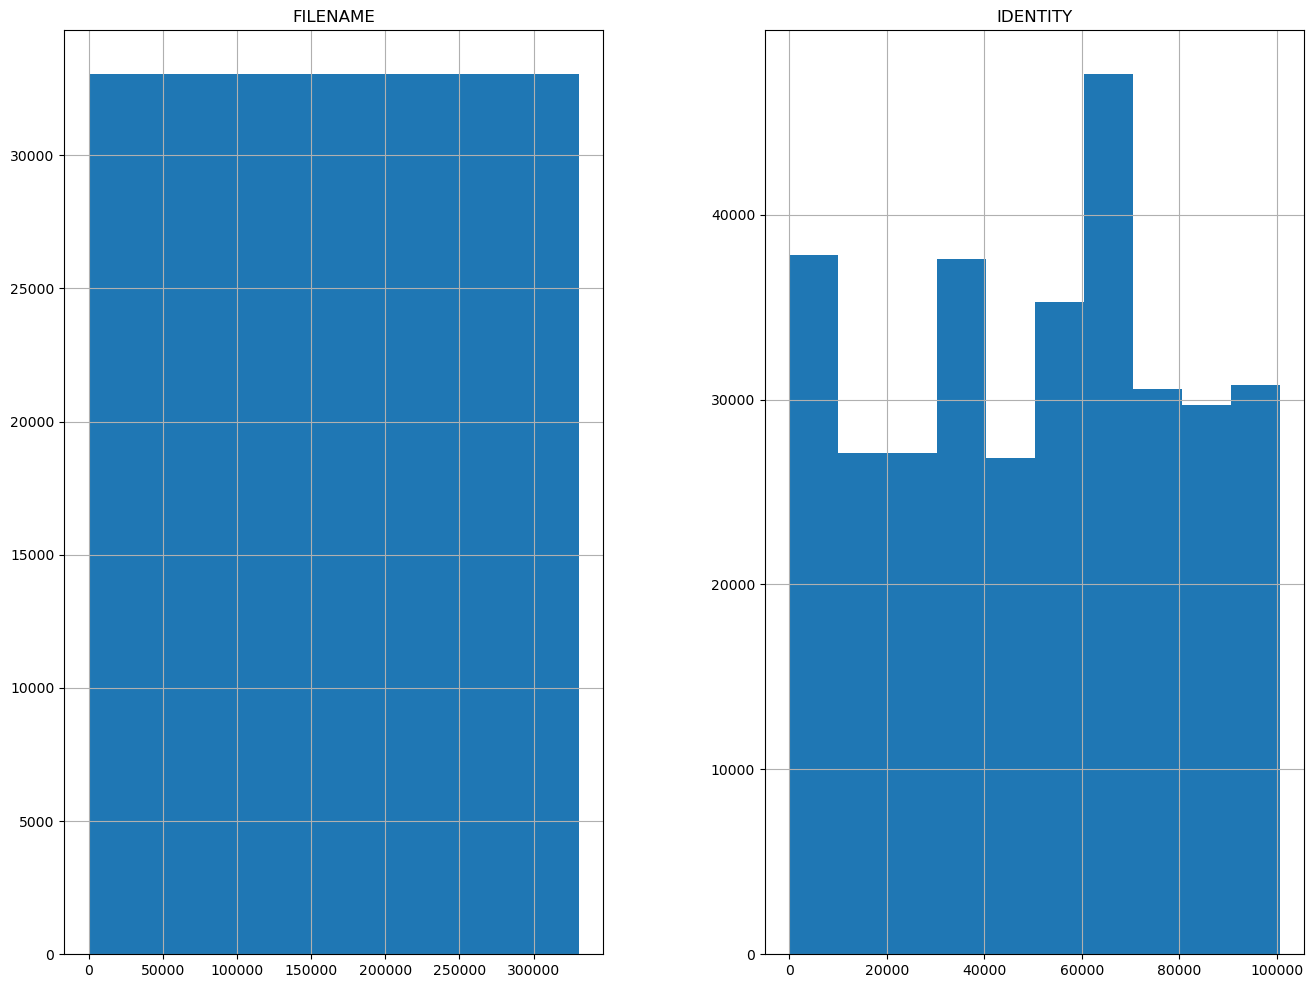

In [36]:
train.hist(figsize=(16,12))
plt.show()

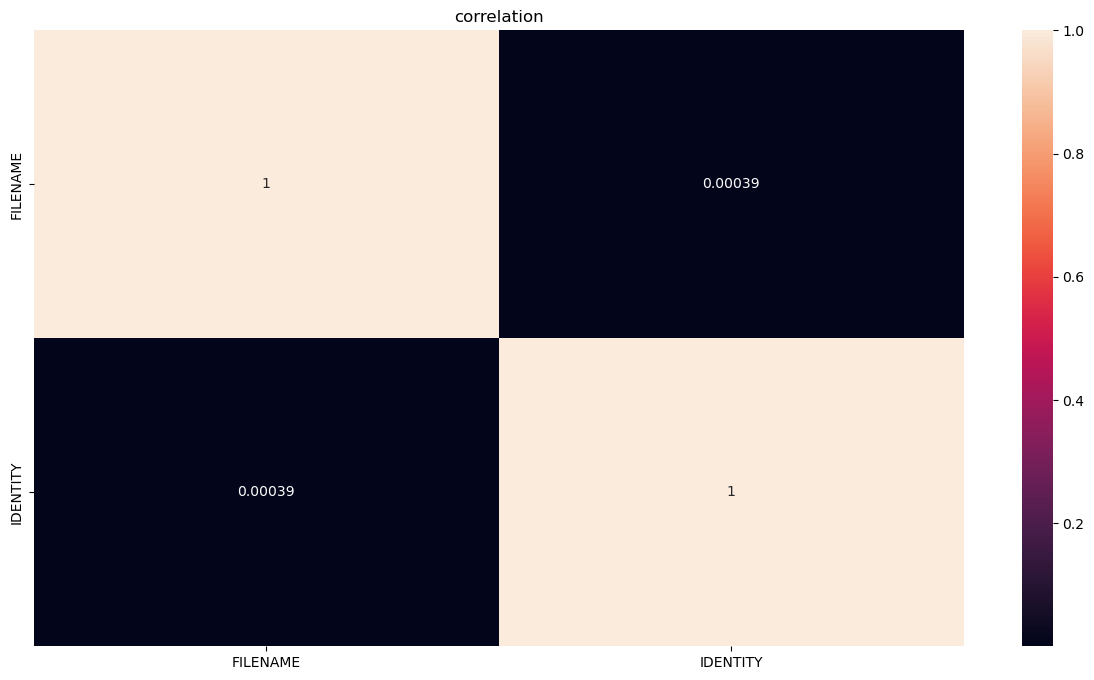

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True)
plt.title("correlation")
plt.show()

<AxesSubplot:xlabel='IDENTITY'>

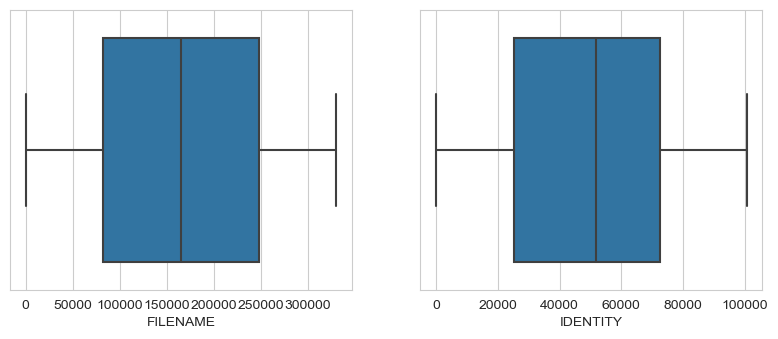

In [40]:
plt.figure(figsize=(15,8))
sns.set_style(style= "whitegrid")
plt.subplot(2,3,1)
sns.boxplot(x="FILENAME", data=train)
plt.subplot(2,3,2)
sns.boxplot(x="IDENTITY", data=train)

<AxesSubplot:xlabel='FILENAME', ylabel='IDENTITY'>

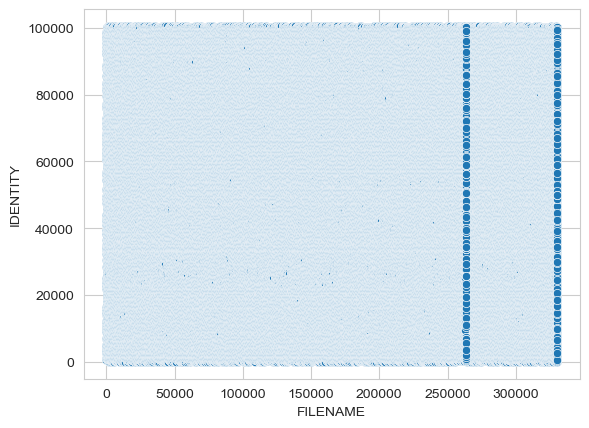

In [41]:
sns.scatterplot(x="FILENAME" , y="IDENTITY" , data=train)

## Now we are going to build some basic model to train and test our model on our data

In [47]:
## first split the data
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state = 12)

In [50]:
print("X_train length : ",len(X_train),"\nX_test length : ",len(X_test),"\ny_train length : ",len(y_train),"\ny_test length : ",len(y_test))

X_train length :  231277 
X_test length :  99119 
y_train length :  231277 
y_test length :  99119


In [52]:
from tensorflow import keras
from tensorflow.keras import layers

model  = tf.keras.Sequential([
    tf.keras.layers.Dense(units=80 ,activation = "relu" , name="input_layer"),
    tf.keras.layers.Dense(units=60 ,activation = "relu" , name="dense_layer1"),
    tf.keras.layers.Dense(units=40 ,activation = "relu" , name="dense_layer2"),
    tf.keras.layers.Dense(units=1 , name="output_layer")
], name="Model")


model.compile(optimizer="adam", loss="binary_crossentropy" , metrics=["binary_accuracy"])

In [53]:
history = model.fit(X_train, y_train , batch_size=256 , epochs=150)

Epoch 1/150
904/904 [==============================] - 3s 2ms/step - loss: -2520180.2500 - binary_accuracy: 4.3238e-06
Epoch 2/150
904/904 [==============================] - 2s 2ms/step - loss: -2520221.7500 - binary_accuracy: 4.3238e-06
Epoch 3/150
904/904 [==============================] - 2s 2ms/step - loss: -2520222.5000 - binary_accuracy: 4.3238e-06
Epoch 4/150
904/904 [==============================] - 2s 2ms/step - loss: -2520221.2500 - binary_accuracy: 4.3238e-06
Epoch 5/150
904/904 [==============================] - 2s 2ms/step - loss: -2520220.5000 - binary_accuracy: 4.3238e-06
Epoch 6/150
904/904 [==============================] - 2s 2ms/step - loss: -2520221.7500 - binary_accuracy: 4.3238e-06
Epoch 7/150
904/904 [==============================] - 2s 2ms/step - loss: -2520222.5000 - binary_accuracy: 4.3238e-06
Epoch 8/150
904/904 [==============================] - 2s 2ms/step - loss: -2520220.0000 - binary_accuracy: 4.3238e-06
Epoch 9/150
904/904 [===========================

3098/3098 [==============================] - 4s 1ms/step


<AxesSubplot:>

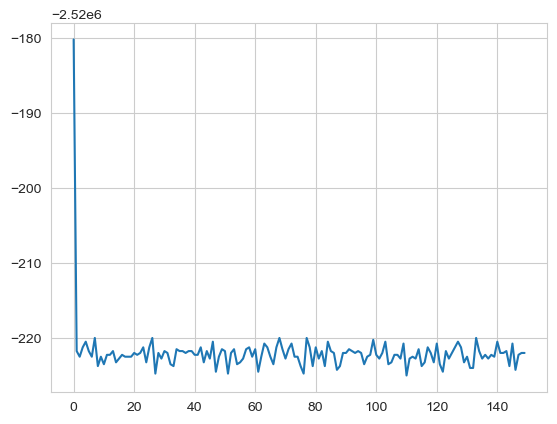

In [54]:
y_pred = model.predict(X_test)
y_pred

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Best Validation Loss: -2520225.0000
Best Validation Accuracy: 0.0000


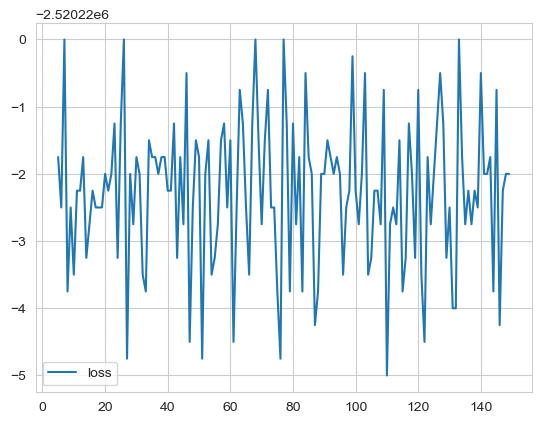

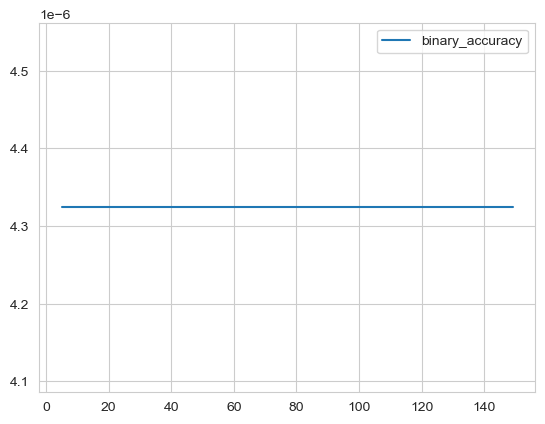

In [56]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(), 
              history_df['binary_accuracy'].max()))

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# *FIN*